In [1]:
# basic modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#settings
warnings.filterwarnings('ignore')
rs = 42

In [2]:
df = pd.read_csv('data/mimic_clean.csv')

# Overview

In [3]:
df.columns

Index(['label', 'gender', 'age', 'numb_diagn', 'last_careunit', 'los',
       'tracheo', 'PaO2', 'base_excess', 'creatinin', 'hb', 'hct', 'pH',
       'FiO2', 'PEEP', 'SaO2', 'blood_pr', 'hr', 'lactic_acid', 'leuko',
       'mean_insp_pr', 'resp_rat', 'tidal_vol', 'breath_min_vol'],
      dtype='object')

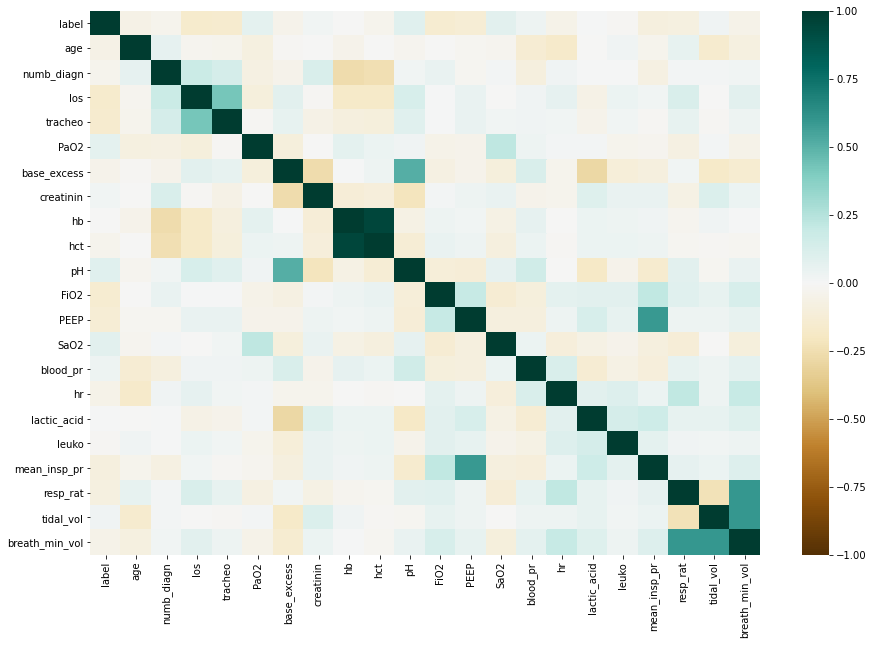

In [4]:
plt.figure(figsize=(15,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap="BrBG",annot=False, vmin=-1, vmax=1);

Because hemoglobin und hematocrit are strongly correlated statistically as well as biologically, we decide to drop one. In our case hematocrit. 

In [5]:
df.drop('hct', axis=1, inplace=True)

In [6]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

In [7]:
so[so < 1].head(15)

breath_min_vol  tidal_vol         0.598741
tidal_vol       breath_min_vol    0.598741
breath_min_vol  resp_rat          0.596622
resp_rat        breath_min_vol    0.596622
mean_insp_pr    PEEP              0.593360
PEEP            mean_insp_pr      0.593360
pH              base_excess       0.515226
base_excess     pH                0.515226
tracheo         los               0.427171
los             tracheo           0.427171
lactic_acid     base_excess       0.283863
base_excess     lactic_acid       0.283863
                creatinin         0.263226
creatinin       base_excess       0.263226
hb              numb_diagn        0.261867
dtype: float64

In [8]:
#sns.pairplot(df)

# Check Datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 23 columns):
label             5836 non-null int64
gender            5836 non-null object
age               5836 non-null float64
numb_diagn        5836 non-null int64
last_careunit     5836 non-null object
los               5836 non-null float64
tracheo           5836 non-null int64
PaO2              5836 non-null float64
base_excess       5836 non-null float64
creatinin         5836 non-null float64
hb                5836 non-null float64
pH                5836 non-null float64
FiO2              5836 non-null float64
PEEP              5836 non-null float64
SaO2              5836 non-null float64
blood_pr          5836 non-null float64
hr                5836 non-null float64
lactic_acid       5836 non-null float64
leuko             5836 non-null float64
mean_insp_pr      5836 non-null float64
resp_rat          5836 non-null float64
tidal_vol         5836 non-null float64
breath_min_vol    583

Change 'gender' to 'ismale': 1= True, 0= False

In [10]:
df['ismale'] = df.gender.apply(lambda x: 1 if x == 'M' else 0)

In [11]:
df.ismale.unique()

array([1, 0])

In [12]:
df.drop('gender', axis=1, inplace=True)

In [13]:
#Feature_new = pd.get_dummies(df['Feature'], prefix=" ", drop_first=True)
Feature_new = pd.get_dummies(df.last_careunit, prefix="icu", drop_first=True)
df = pd.concat([df, Feature_new],axis=1)

In [14]:
df.drop('last_careunit', axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 26 columns):
label             5836 non-null int64
age               5836 non-null float64
numb_diagn        5836 non-null int64
los               5836 non-null float64
tracheo           5836 non-null int64
PaO2              5836 non-null float64
base_excess       5836 non-null float64
creatinin         5836 non-null float64
hb                5836 non-null float64
pH                5836 non-null float64
FiO2              5836 non-null float64
PEEP              5836 non-null float64
SaO2              5836 non-null float64
blood_pr          5836 non-null float64
hr                5836 non-null float64
lactic_acid       5836 non-null float64
leuko             5836 non-null float64
mean_insp_pr      5836 non-null float64
resp_rat          5836 non-null float64
tidal_vol         5836 non-null float64
breath_min_vol    5836 non-null float64
ismale            5836 non-null int64
icu_CSRU          583

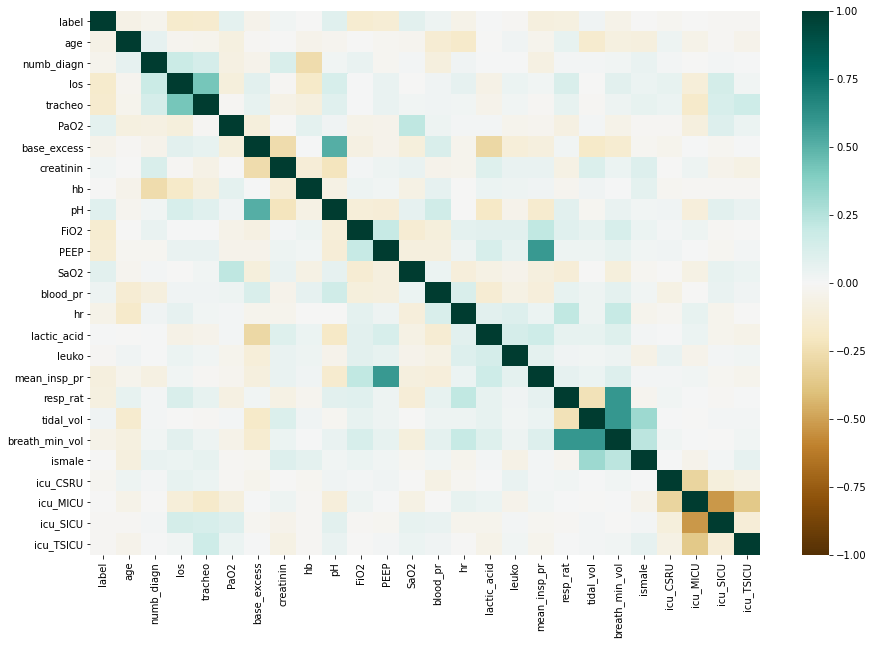

In [16]:
plt.figure(figsize=(15,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap="BrBG",annot=False, vmin=-1, vmax=1);

In [17]:
df.to_csv('data/mimic_premodel.csv', index=False)

# Scaling and Train/Test-Split

In [102]:
X = df.iloc[:, 1:]
y = df.label

In [99]:
X.head()

,age,numb_diagn,los,tracheo,PaO2,base_excess,creatinin,hb,pH,FiO2,...,leuko,mean_insp_pr,resp_rat,tidal_vol,breath_min_vol,ismale,icu_CSRU,icu_MICU,icu_SICU,icu_TSICU
0,56.0,11,6.1731,1,86.0,2.0,1.1,10.3,7.43,35.000000,...,10.7,6.0,18.0,653.0,11.754,1,0,1,0,0
1,28.0,8,0.6924,0,171.0,4.0,0.8,14.3,7.52,40.000001,...,9.3,6.4,20.0,430.0,8.600,1,0,1,0,0
2,37.0,26,10.5061,0,39.0,10.0,1.1,14.0,7.41,70.000000,...,17.2,6.0,16.0,151.0,2.416,1,0,1,0,0
3,46.0,11,1.6501,0,365.0,2.0,1.0,14.0,7.39,50.000000,...,8.4,1.0,18.0,441.0,7.938,1,0,1,0,0
4,57.0,18,3.7287,0,143.0,5.0,0.7,15.2,7.47,30.000000,...,8.5,7.0,17.0,481.0,8.177,1,0,0,0,0


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs, stratify=y)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4377 samples.
Testing set has 1459 samples.


In [107]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Dummy

# Base Model